# Визуализация данных (MatPlotLib)

## Формулировка задания:

Спомощью фреймворка MatPlotLib визуализировать результаты аналитики из домашннго задания №5.

## Планируемый результат:

В ноутбуке Colab под каждым аналитическим исследованием имеется графическое изображение результатов исследования

## Описания плана работы:

Открыть ноутбук в Colab из ДЗ №5.

Результаты п.8 с помощью matplotlib визуализировать.
Пример: Количество выживших и умерших в зависимости от возраста (* возраст берется в интервалах 10 лет)

In [99]:
# Подключаем необходимые библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#Загружаем датасет
df = pd.read_csv('Titanic-Dataset.csv', delimiter=',', index_col=[0])
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [101]:
# Определяем количество пропущенных ячеек в каждом столбце
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [102]:
# Заполняем пропущенные ячейки в стобце Cabin
df['Cabin'] = df['Cabin'].fillna(method='bfill')

In [103]:
# Заполняем пропущенные ячейки в стобце Cabin
df['Cabin'] = df['Cabin'].fillna(method='ffill')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [104]:
# Заполняем пропущенные значения в столбце возраста медианным значением по столбцу
median_age = df.Age.median()
df.fillna({'Age' : median_age}, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [105]:
df.dropna(axis = 'index', subset = ['Embarked'], inplace = True)

In [106]:
# разделим выборку на выживших и погибших
is_survived = df['Survived'] == 1
is_dead = df['Survived'] == 0

df_survived = df.loc[is_survived]
df_dead = df.loc[is_dead]

In [107]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Формируем график зависимости выживших в зависимости от возраста

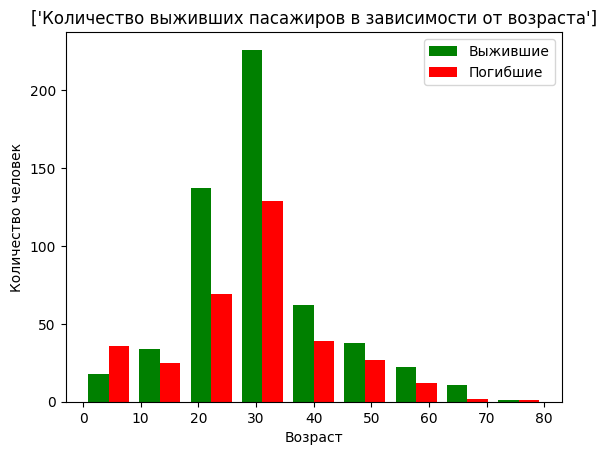

In [108]:
data_to_plot = [df_dead['Age'], df_survived['Age']]
x_points = np.linspace(0, 80, 10)
xylabel = ['Возраст', 'Количество человек']
title = ['Количество выживших пасажиров в зависимости от возраста']
plt.hist(data_to_plot, x_points, color = ['green', 'red'], label=['Выжившие', 'Погибшие']) 
plt.legend(loc = 'upper right')
plt.xlabel(xylabel[0])
plt.ylabel(xylabel[1])
plt.title(title)
plt.show()

### Формируем график зависимости выживших в зависимости от пола

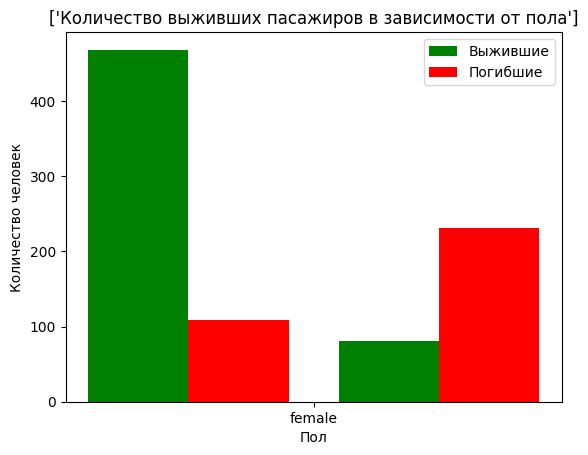

In [109]:
data_to_plot = [df_dead['Sex'], df_survived['Sex']]
x_points = np.linspace(0, 2, 3)
xylabel = ['Пол', 'Количество человек']
title = ['Количество выживших пасажиров в зависимости от пола']
plt.hist(data_to_plot, x_points, color = ['green', 'red'], label=['Выжившие', 'Погибшие']) 
plt.legend(loc = 'upper right')
plt.xlabel(xylabel[0])
plt.ylabel(xylabel[1])
plt.title(title)
plt.show()

### Формируем график зависимости выживших в зависимости от количества братьев, сестер или наличия супругов у пасажира

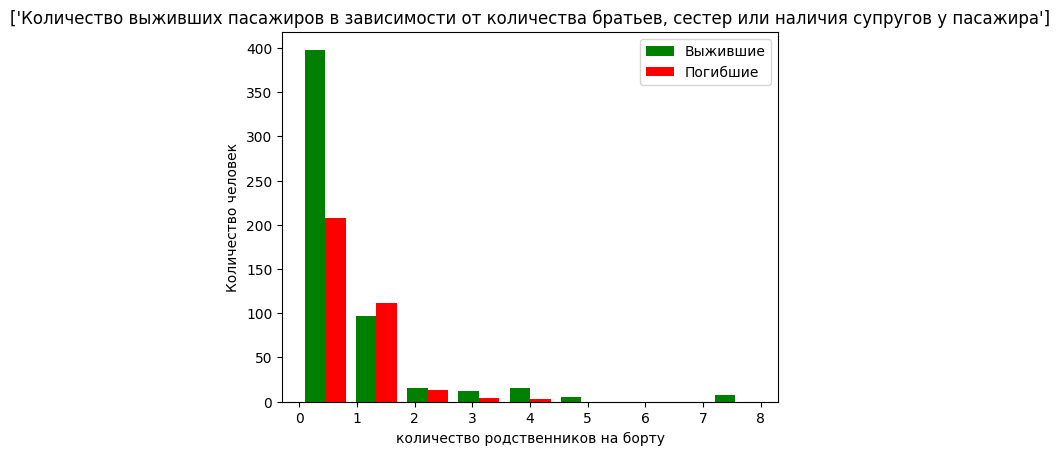

In [110]:
data_to_plot = [df_dead['SibSp'], df_survived['SibSp']]
x_points = np.linspace(0, 8, 10)
xylabel = ['количество родственников на борту', 'Количество человек']
title = ['Количество выживших пасажиров в зависимости от количества братьев, сестер или наличия супругов у пасажира']
plt.hist(data_to_plot, x_points, color = ['green', 'red'], label=['Выжившие', 'Погибшие']) 
plt.legend(loc = 'upper right')
plt.xlabel(xylabel[0])
plt.ylabel(xylabel[1])
plt.title(title)
plt.show()

### Формируем график зависимости выживших в зависимости от количеством родителей или детей, с которыми путешествовал каждый пассажир

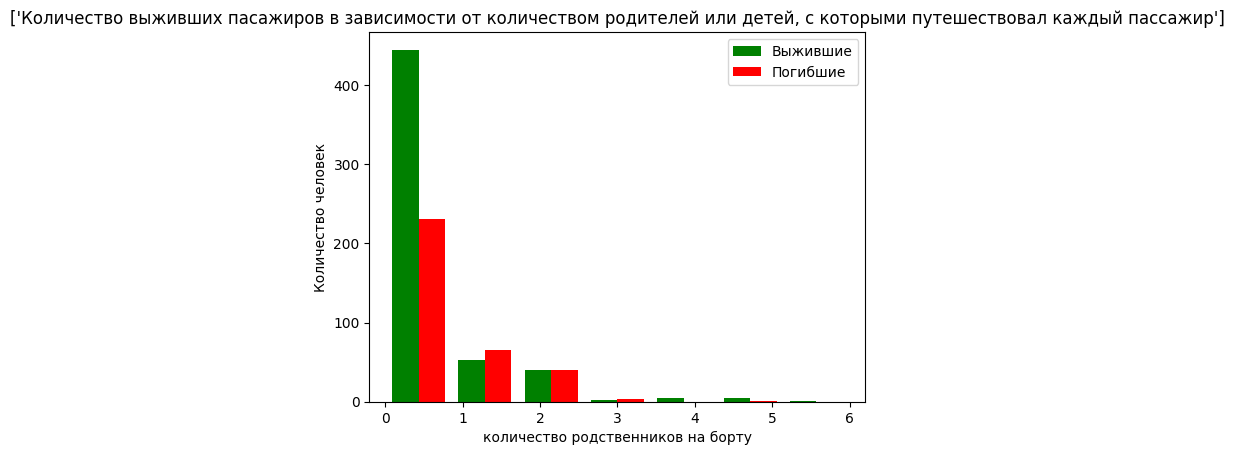

In [111]:
data_to_plot = [df_dead['Parch'], df_survived['Parch']]
x_points = np.linspace(0, 6, 8)
xylabel = ['количество родственников на борту', 'Количество человек']
title = ['Количество выживших пасажиров в зависимости от количеством родителей или детей, с которыми путешествовал каждый пассажир']
plt.hist(data_to_plot, x_points, color = ['green', 'red'], label=['Выжившие', 'Погибшие']) 
plt.legend(loc = 'upper right')
plt.xlabel(xylabel[0])
plt.ylabel(xylabel[1])
plt.title(title)
plt.show()

### Формируем график зависимости выживших в зависимости от порта посадки

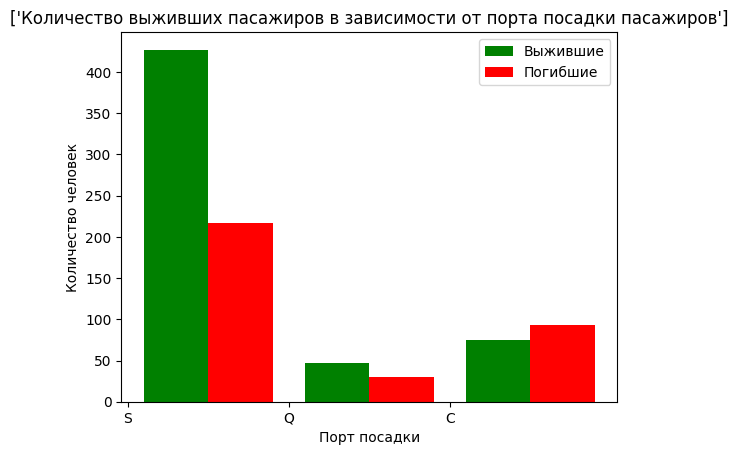

In [118]:
data_to_plot = [df_dead['Embarked'], df_survived['Embarked']]
x_points = np.linspace(0, 3, 4)
xylabel = ['Порт посадки', 'Количество человек']
title = ['Количество выживших пасажиров в зависимости от порта посадки пасажиров']
plt.hist(data_to_plot, x_points, color = ['green', 'red'], label=['Выжившие', 'Погибшие']) 
plt.legend(loc = 'upper right')
plt.xlabel(xylabel[0])
plt.ylabel(xylabel[1])
plt.title(title)
plt.show()